Імпортування бібліотек

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

Розглядається датасет з цін діамантів

In [ ]:
df = pd.read_csv('M6_T2_V1_Diamonds.csv')

In [ ]:
df_copy = df.copy()

In [ ]:
df.head()

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75


In [ ]:
df.shape

(53940, 8)

In [ ]:
df.describe()

,carat,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,3932.799722,5.731157,5.734526,3.538734
std,0.474011,3989.439738,1.121761,1.142135,0.705699
min,0.200000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   price    53940 non-null  int64  
 5   x        53940 non-null  float64
 6   y        53940 non-null  float64
 7   z        53940 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 3.3+ MB


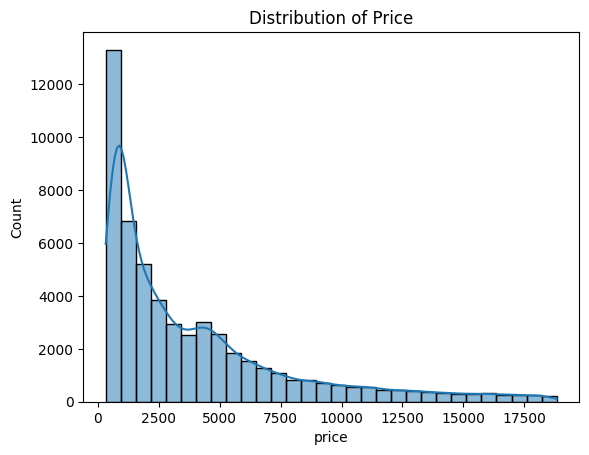

In [ ]:
sns.histplot(df_copy['price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.show()

Виявлення та видалення дублікатів

In [ ]:
df[df.duplicated()]

,carat,cut,color,clarity,price,x,y,z
398,0.30,Premium,H,SI1,554,4.28,4.24,2.68
1005,0.79,Ideal,G,SI1,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,2898,5.90,5.85,3.66
...,...,...,...,...,...,...,...,...
50079,0.51,Ideal,F,VVS2,2203,5.19,5.17,3.17
50364,0.53,Ideal,G,IF,2247,5.18,5.22,3.21
51631,0.31,Good,E,SI1,544,4.31,4.33,2.74
52861,0.50,Fair,E,VS2,2579,5.21,5.18,4.09


In [ ]:
df_copy = df_copy.drop_duplicates()
df_copy.shape

(53644, 8)

In [ ]:
df_copy

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,2757,6.15,6.12,3.74


In [ ]:
for column in df_copy.columns:
  print(df_copy[column].value_counts())

carat
0.30    2569
1.01    2239
0.31    2209
0.70    1981
0.32    1799
        ... 
3.02       1
3.65       1
3.50       1
3.22       1
3.11       1
Name: count, Length: 273, dtype: int64
cut
Ideal        21381
Premium      13730
Very Good    12050
Good          4885
Fair          1598
Name: count, dtype: int64
color
G    11216
E     9732
F     9498
H     8261
D     6734
I     5403
J     2800
Name: count, dtype: int64
clarity
SI1     13006
VS2     12166
SI2      9148
VS1      8129
VVS2     5043
VVS1     3639
IF       1773
I1        740
Name: count, dtype: int64
price
605      132
776      124
802      124
625      123
828      120
        ... 
14683      1
14680      1
14675      1
8812       1
9793       1
Name: count, Length: 11602, dtype: int64
x
4.37     441
4.34     430
4.38     422
4.33     418
4.32     416
        ... 
10.23      1
9.51       1
9.66       1
9.35       1
10.14      1
Name: count, Length: 554, dtype: int64
y
4.34     429
4.37     426
4.35     420
4.33     412
4.32

Кодування категоріальних змін

In [ ]:
categories = [
    ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
    ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
    ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
]
cat_columns = ['cut', 'color', 'clarity']

encoder = OrdinalEncoder(categories=categories)
encoder.categories_ = categories

enc_cols = encoder.fit_transform(df_copy[cat_columns])
for i in range(len(cat_columns)):
  df_copy[cat_columns[i]] = enc_cols[:, i]

In [ ]:
columns = ['carat', 'cut', 'color', 'clarity', 'x', 'y', 'z', 'price']
df_copy = pd.DataFrame(df_copy, columns=columns)
df_copy

,carat,cut,color,clarity,x,y,z,price
0,0.23,4.0,5.0,1.0,3.95,3.98,2.43,326
1,0.21,3.0,5.0,2.0,3.89,3.84,2.31,326
2,0.23,1.0,5.0,4.0,4.05,4.07,2.31,327
3,0.29,3.0,1.0,3.0,4.20,4.23,2.63,334
4,0.31,1.0,0.0,1.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...
53935,0.72,4.0,6.0,2.0,5.75,5.76,3.50,2757
53936,0.72,1.0,6.0,2.0,5.69,5.75,3.61,2757
53937,0.70,2.0,6.0,2.0,5.66,5.68,3.56,2757
53938,0.86,3.0,2.0,1.0,6.15,6.12,3.74,2757


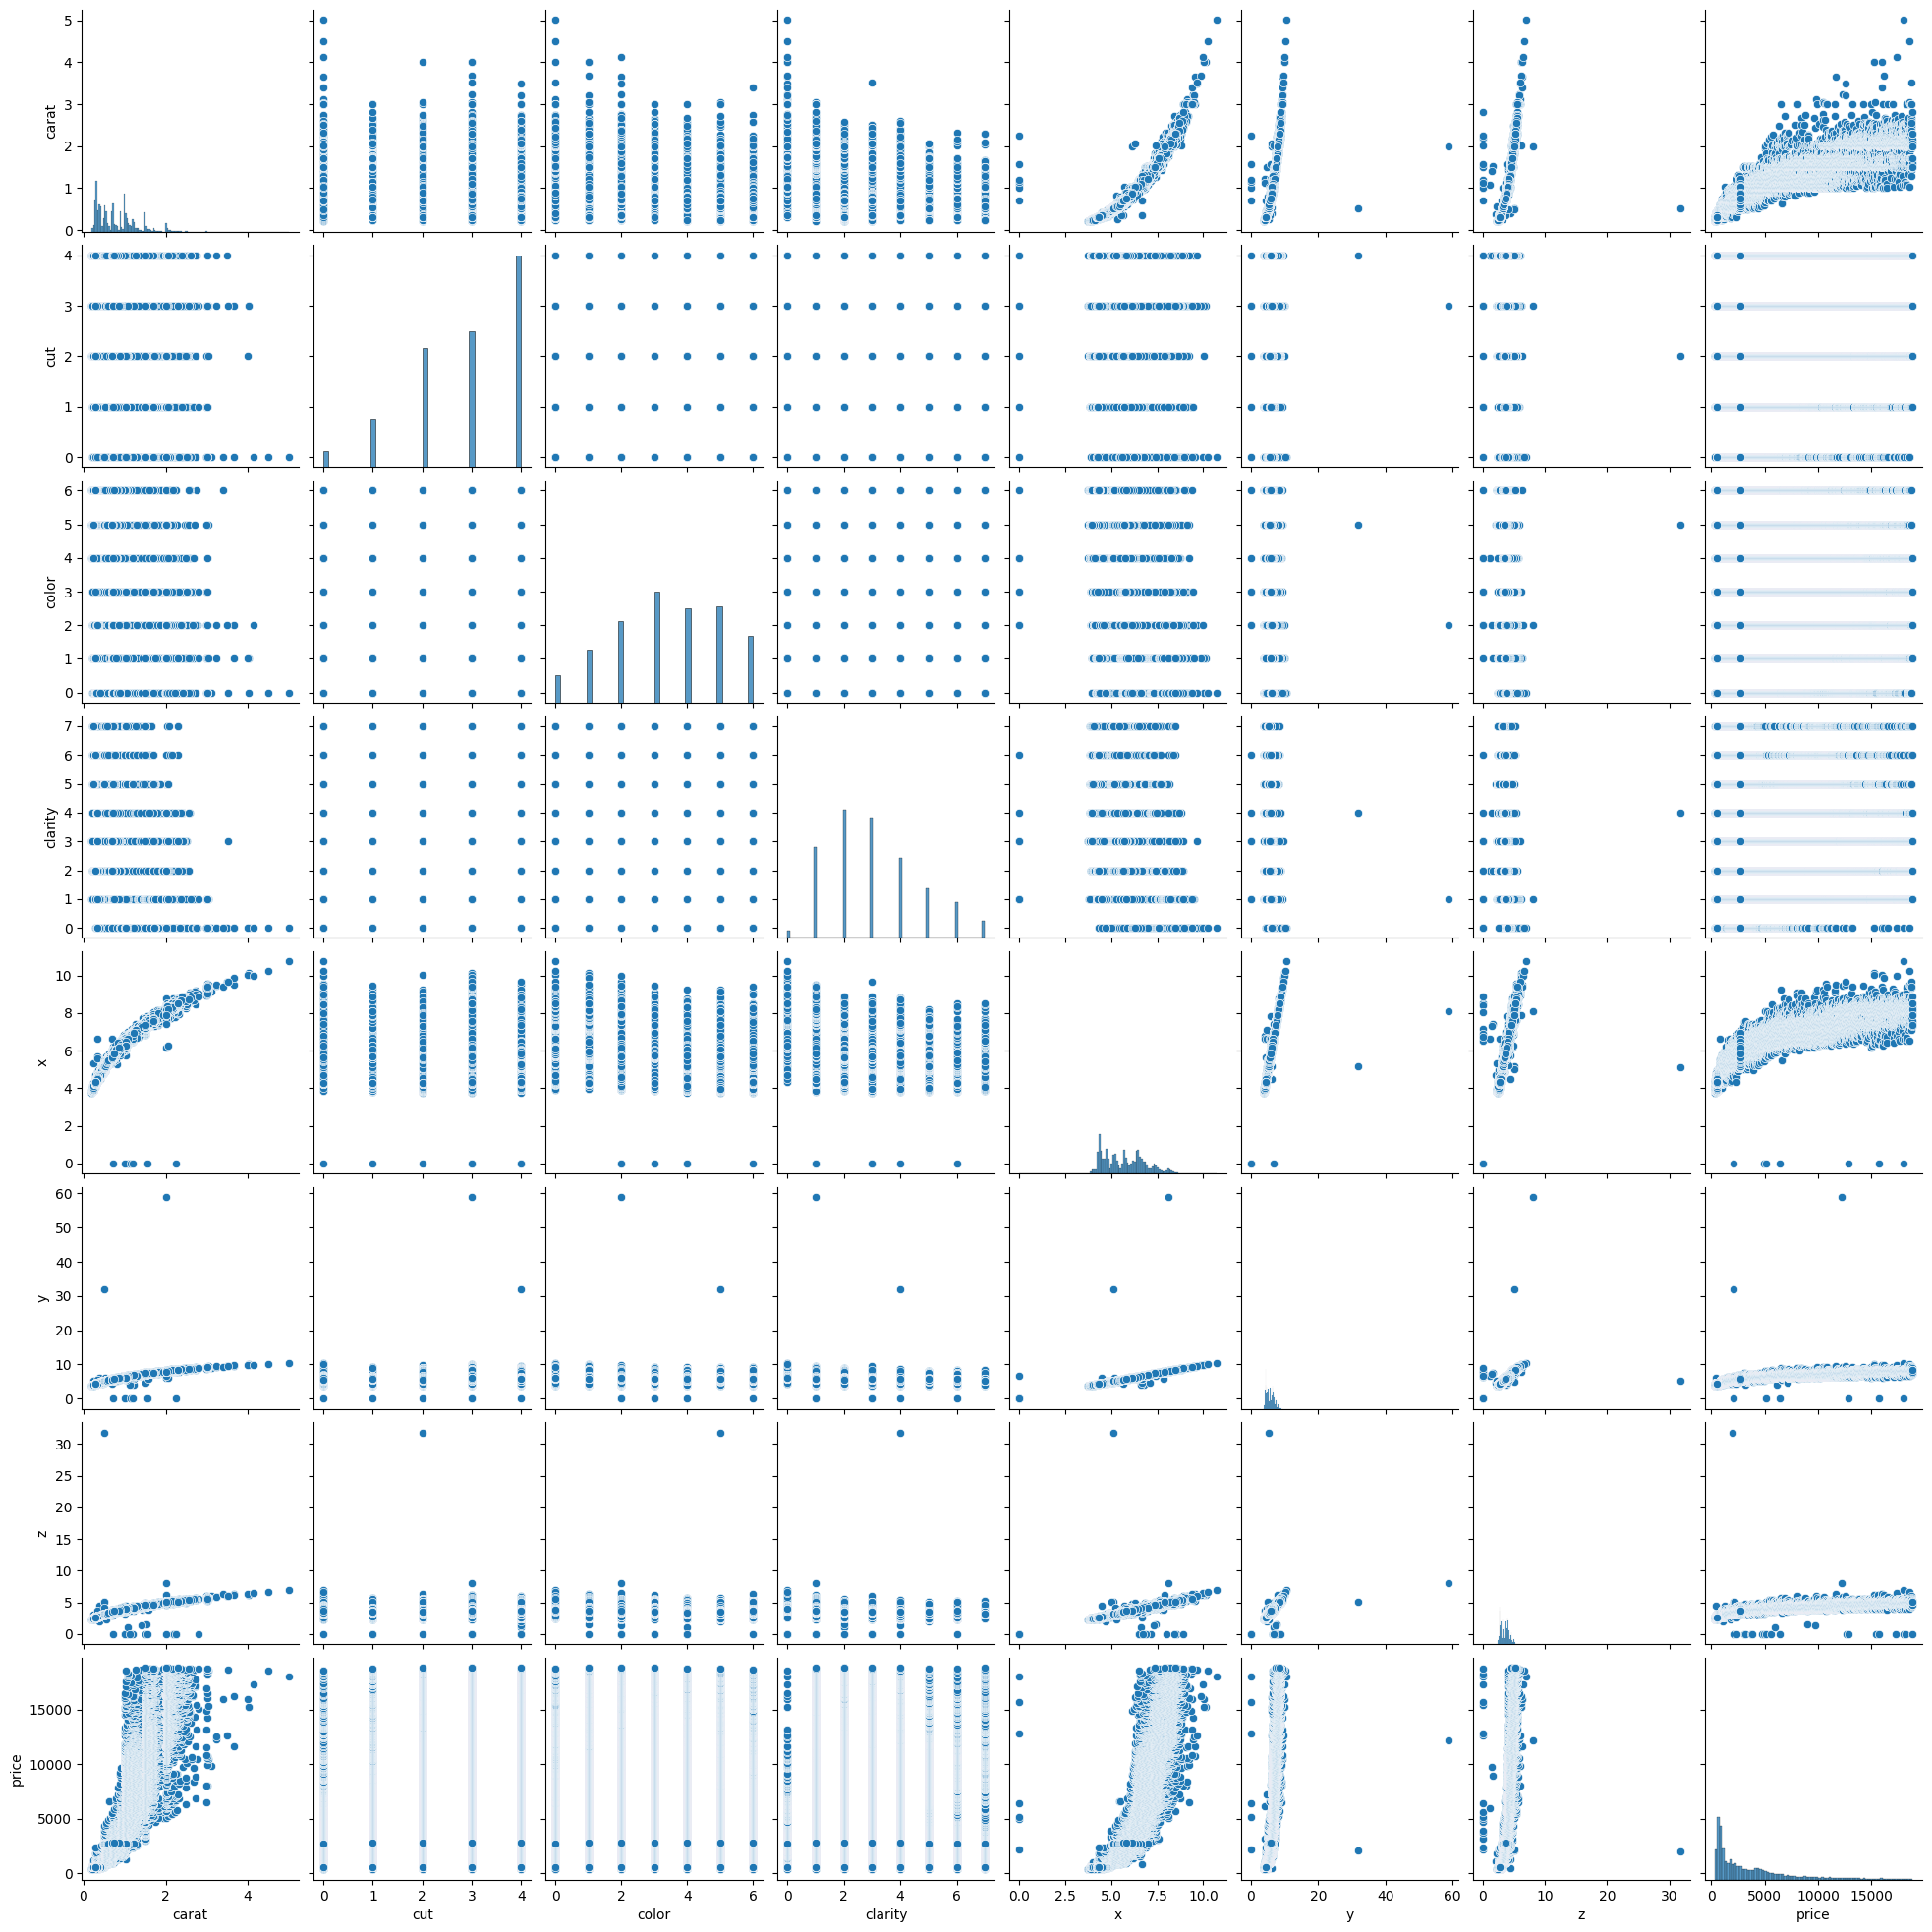

In [ ]:
sns.pairplot(df_copy)

Графік показує пряму лінійну залежність змінної карат, а також змінних x, y, z (розміри діаманту) з цільовою змінною price, що є логічно

<Axes: >

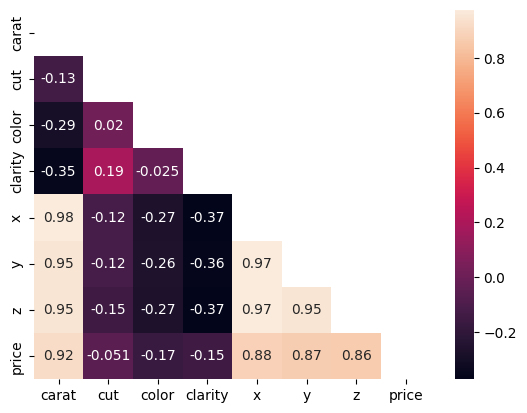

In [ ]:
sns.heatmap(df_copy.corr(), annot=True, mask=np.triu(df_copy.corr()))

Матриця кореляції показує пряму та протилежну залежність між змінними

In [ ]:
df_copy.corr()['price'].sort_values()

color     -0.171451
clarity   -0.145723
cut       -0.051239
z          0.861037
y          0.865240
x          0.884411
carat      0.921443
price      1.000000
Name: price, dtype: float64

Нормалізуємо дані для навчання за допомогою функції StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(df_copy)
scaled_df = scaler.transform(df_copy)
scaled_df = pd.DataFrame(scaled_df, columns=df_copy.columns)

In [ ]:
X = scaled_df.drop(['cut', 'color', 'clarity', 'price'], axis=1)
y = scaled_df['price']

Оскільки задача прогнозування ціни діамантів, використовуємо лінійну регресію

In [ ]:
model = LinearRegression()

Для оцінки моделі та недопустимості перенавчання використовуємо K-Fold метод крос-валідації, де обираємо кількість рівних розбитів навчальної вибірки на 5 частин. Оцінюємо кожне розбиття за допомогою метрики R2-score.

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')

In [ ]:
print("Значення R^2 для кожного розбиття крос-валідації:", scores)
print("Середнє значення R^2:", np.mean(scores))

Значення R^2 для кожного розбиття крос-валідації: [0.86408246 0.85800941 0.83869065 0.60128878 0.85295883]
Середнє значення R^2: 0.8030060272739575


Оцінка R2 показала в середньому значення 0.80, що говорить про якісну варіацію навчальних даних.

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
test_score = model.score(X_test, y_test)
print("R^2 на тестовому наборі даних:", test_score)

R^2 на тестовому наборі даних: 0.8470522988479252


Навчана модель показує гарний результат на тестових даних.

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [ ]:
print(f"Train MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")
print(f"Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}")
print(f"Train MAE: {train_mae:.2f}, Test MAE: {test_mae:.2f}")
print(f"Train R^2: {train_r2:.4f}, Test R^2: {test_r2:.4f}")

Train MSE: 0.15, Test MSE: 0.15
Train RMSE: 0.38, Test RMSE: 0.39
Train MAE: 0.23, Test MAE: 0.23
Train R^2: 0.8556, Test R^2: 0.8471


Використовуємо стандартні метрики оцінки моделі лінійної регресії. Кожна з моделей в принципі показує маленьку похибку, що свідчить про здатність моделі добре передбачати ціни діамантів на нових даних, які модель ще не бачила.

Була обрана модель лінійної регресії тому, що задача була поставлена в прогнозувані ціни, яка є неперервною змінною. Оскільки обрана задача є задачею лінійної регресії, використані в неї метрики оцінювання були задіяні для оцінки моделі лінійної регресії (MSE, RMSE, R2 та ін.). Модель краще стала працювати, коли в дані було додано нормалізацію для здатності моделі краще навчатись на схожих за розмірністю даних.